In [2]:
import pandas as pd
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from subprocess import check_output
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

In [3]:
reddit = pd.read_csv("/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/engagement/reddit_test.csv")

IOError: File /Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/engagement/reddit_test.csv does not exist

In [24]:
text = reddit["body"]

In [6]:
text = text.dropna()

In [25]:
text.head()

0    I stayed in all day and it did not show up. Ch...
1    "WELCOME TO VIRGIN MOBILE VOICEMAIL!!!11!!!!1!...
2    At 0.53Mb/s down, that's just dreadful. The pr...
3    I bought a SIM card yesterday for Virgin Mobil...
4                Yet Sky's box is snappy in comparison
Name: body, dtype: object

In [53]:
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    reddit.set_value(i, 'Sentiment',sentiment)
    if sentiment <0:
        SentimentClass = 'Negative'
        reddit.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment >0:
        SentimentClass = 'Positive'
        reddit.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        reddit.set_value(i, 'SentimentClass', SentimentClass )

In [54]:
reddit.to_csv("/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/engagement/reddit_sentiment.csv")



In [55]:
####wordcloud
mask = imread("/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/engagement/logo.png")
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white",stopwords = stopwords, mask = mask)
wordcloud.generate(str(reddit["body"]))


In [56]:
plt.imshow(wordcloud)

In [57]:
plt.axis("off")

(-0.5, 2399.5, 2399.5, -0.5)

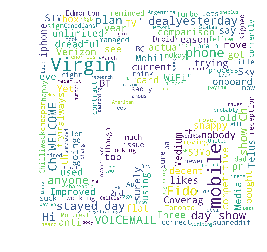

In [58]:
plt.savefig("/Users/xuetan/Desktop/Ivey_Business Analytics/Programming/Rworkfile/engagement/wordcloud.png", dpi=300)
plt.show()